In [ ]:
#Again we use the "!" command to specify we want to execute commands via the terminal, outside python
#rootls is an example of a root command line tool: 
#https://root.cern/manual/storing_root_objects/#root-command-line-tools
#Allows to run common operations from the linux/mac terminal, without running ROOT or python directly.
! rootls ../Lecture1/tree2.root

In [ ]:
#To do the same in python we would have to type:
from ROOT import TFile
myFile = TFile.Open("../Lecture1/tree2.root")
#Note the output is a bit more detailed though
myFile.ls()

In [ ]:
#"make" is a standard command to build an executable, which you can run. An executable can be thought of as a 
#translation of your computer code into something the computer can understand. When using python this happens in
#real time, behind the scenes.
#The "!" tells Jupyter to run the command in the underlying terminal.
! make 
#You can see the commands "make" actually runs printed below.
#Lots of options passed to g++ (don't worry about these) - the important part is it creates library files (*.d,*.o)
#and eventually an executable which you run ("myROOTCommand")

In [ ]:
#Run the command in the terminal, and we see what it does.
! ./myROOTCommand ../Lecture1/tree2.root t2

In [ ]:
#We can also make a python shortcut command!
#Note in linux you can skip the "python3" part (needed in Jupyter on mybinder!)
! python3 ./myROOTCommand.py ../Lecture1/tree2.root t2

In [ ]:
#Task 1
#Make your own python shortcut command which draws an arbitrary variable from the TTree in tree2.root

In [1]:
#Now lets use uproot - note there is no c++ version! Python only.
import uproot
#Load the TTree from the ATLAS open data (note the miniTree variable is NOT of type TTree - we are now
#in the uproot ecosystem and not in the ROOT ecosystem
miniTreeZmumu = uproot.open("https://atlas-opendata.web.cern.ch/Legacy13TeV/2lep/MC/mc_364100.Zmumu_PTV0_70_CVetoBVeto.2lep.root")["mini"]
#Lets print the variables in the TTree
miniTreeZmumu.keys()
#note these variables are defined at https://atlas-opendata.web.cern.ch/docs/datasets/dataset13

['runNumber',
 'eventNumber',
 'channelNumber',
 'mcWeight',
 'scaleFactor_PILEUP',
 'scaleFactor_ELE',
 'scaleFactor_MUON',
 'scaleFactor_PHOTON',
 'scaleFactor_TAU',
 'scaleFactor_BTAG',
 'scaleFactor_LepTRIGGER',
 'scaleFactor_PhotonTRIGGER',
 'trigE',
 'trigM',
 'trigP',
 'lep_n',
 'lep_truthMatched',
 'lep_trigMatched',
 'lep_pt',
 'lep_eta',
 'lep_phi',
 'lep_E',
 'lep_z0',
 'lep_charge',
 'lep_type',
 'lep_isTightID',
 'lep_ptcone30',
 'lep_etcone20',
 'lep_trackd0pvunbiased',
 'lep_tracksigd0pvunbiased',
 'met_et',
 'met_phi',
 'jet_n',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_E',
 'jet_jvt',
 'jet_trueflav',
 'jet_truthMatched',
 'jet_MV2c10',
 'photon_n',
 'photon_truthMatched',
 'photon_trigMatched',
 'photon_pt',
 'photon_eta',
 'photon_phi',
 'photon_E',
 'photon_isTightID',
 'photon_ptcone30',
 'photon_etcone20',
 'photon_convType',
 'tau_n',
 'tau_pt',
 'tau_eta',
 'tau_phi',
 'tau_E',
 'tau_isTightID',
 'tau_truthMatched',
 'tau_trigMatched',
 'tau_nTracks',
 'tau_BDTid

In [2]:
#choose which variables we want to use
#For each event with jets, we get an array of size alljet_n (NOT jet_N!)
#entry_stop restricts the number of entries to use (just done to make example run faster...)
#library set to 'pd' gives us a pandas dataframe
df_Zmumu = miniTreeZmumu.arrays(["lep_n","jet_n"],library='pd',entry_stop=1000)
df_Zmumu

,lep_n,jet_n
0,2,0
1,2,2
2,2,1
3,2,0
4,2,0
...,...,...
995,2,1
996,2,0
997,2,1
998,2,1


array([[<Axes: title={'center': 'jet_n'}>]], dtype=object)

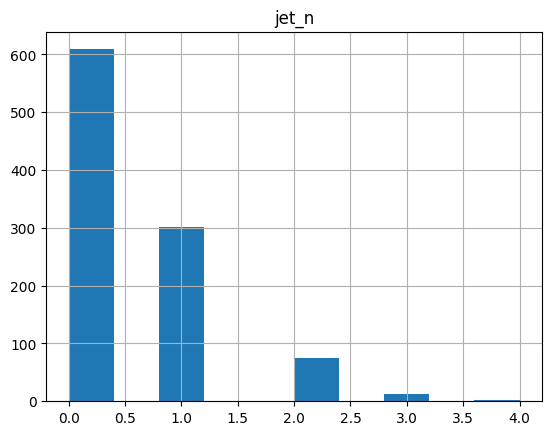

In [3]:
#In my notebook, had to run this cell twice to get the histograms to display...
df_Zmumu.hist("jet_n")

array([[<Axes: title={'center': 'jet_n'}>]], dtype=object)

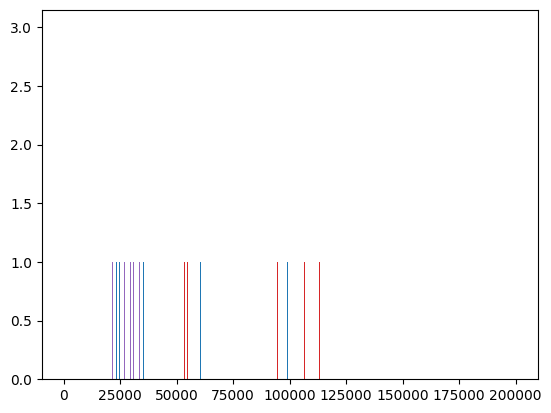

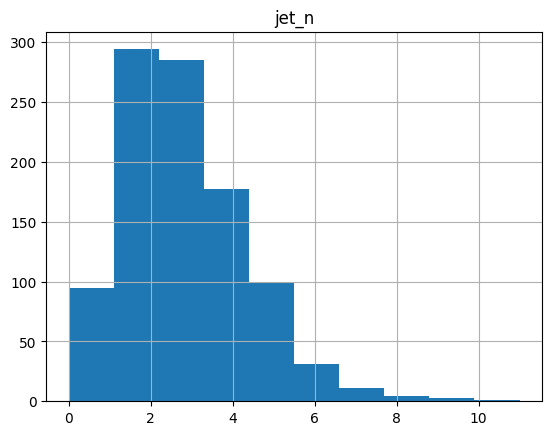

In [4]:
miniTreeTTbar = uproot.open("https://atlas-opendata.web.cern.ch/Legacy13TeV/2lep/MC/mc_410000.ttbar_lep.2lep.root")["mini"]
df_ttbar = miniTreeTTbar.arrays(["jet_n","jet_pt"],library='pd',entry_stop=1000)
#jet_pt is an "awkward array" (i.e of variable size), stored as a series
#so we have to use this procedure to flatten it to a 1-D array that 
#the hist function would use.
jet_pt = (df_ttbar['jet_pt']).to_numpy()
import awkward, matplotlib.pylab as plt

jet_ptHist = plt.hist(jet_pt,bins=100,range=[0,200000])
#Other variable types can be histogrammed directly using the pandas array
df_ttbar.hist("jet_n",bins=10)

In [5]:
#Task 2
#Try making some histograms of other quantities in the open data.
#Can you reproduce plots we saw in earlier Lectures with .../Lecture1/tree2.root using uproot and matplotlib?

In [6]:
#redefine ttbar array with same variables as Zmumu array
df_ttbar = miniTreeTTbar.arrays(["lep_n","jet_n"],library='pd',entry_stop=1000)
df_Zmumu=df_Zmumu.assign(signal=1)
df_ttbar=df_ttbar.assign(signal=0)
#Create a list of the two pandas data frames
df_list = [df_Zmumu,df_ttbar]
#Convert this new list to one pandas data frame
import pandas
df_all = pandas.concat(df_list)
#In case we only have integers, make sure they are treated as floats (ML software usually requires variables to be floats)
df_all = df_all.astype('float64')
df_all

,lep_n,jet_n,signal
0,2.0,0.0,1.0
1,2.0,2.0,1.0
2,2.0,1.0,1.0
3,2.0,0.0,1.0
4,2.0,0.0,1.0
...,...,...,...
995,2.0,2.0,0.0
996,2.0,3.0,0.0
997,2.0,3.0,0.0
998,2.0,3.0,0.0


array([[<Axes: title={'center': 'signal'}>]], dtype=object)

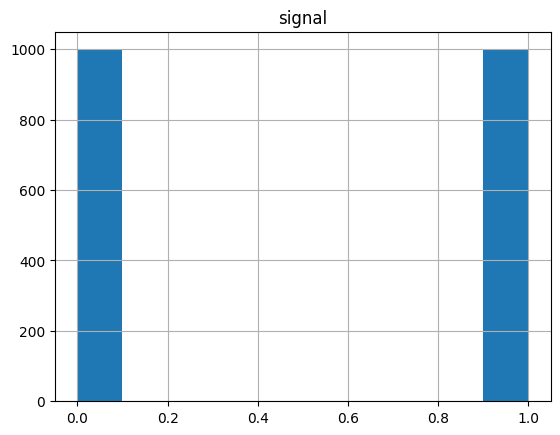

In [7]:
df_all.hist("signal")

In [8]:
dataset = df_all.values
X = dataset[:,0:2]
Y = dataset[:,2]

In [9]:
#ML prefers to have variables distributed in a specific way
#Here we require them to have mean of zero and standard deviation of 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [10]:
import keras as ks
keras_model = ks.Sequential()
keras_model.add(ks.layers.Dense(12,activation='relu'))
keras_model.add(ks.layers.Dense(8, activation='relu'))
keras_model.add(ks.layers.Dense(1, activation='sigmoid'))

In [12]:
keras_model.compile(optimizer='adam', loss='binary_crossentropy')
keras_model.fit(X,Y,epochs=10,batch_size=32)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 0.6398 
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 0.5413
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 0.4329
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 0.3431
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 0.2893
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 0.2696
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.2429
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 0.2517
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 0.2303
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 0.2582


In [25]:
import numpy as np

predictions = keras_model.predict(X)

#Change our predicted probability to a binary 0 or 1
def final_predictions(predictions):
    finalPredictions = np.zeros((len(predictions),))
    for i in range(len(predictions)):
        if predictions[i] > 0.5:
            finalPredictions[i] = 1
        else:
            finalPredictions[i] = 0

    return finalPredictions

#Count how often our predictin matches the true signal value
def count_correct_predictions(predictions, Y):
    nCorrect = 0
    for i in range(len(predictions)-1):
        if predictions[i] == Y[i]:
            nCorrect += 1
    return nCorrect

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step


In [26]:
finalPredictions = final_predictions(predictions)
print("Number of correct predictions are ", count_correct_predictions(finalPredictions, Y))

Number of correct predictions are  1818


In [27]:
#Build the same model using Google DeepMinds Sonnet software
import sonnet as snt
import tensorflow as tf

def build_model():
  model = snt.Sequential([
      snt.Linear(12),
      tf.nn.relu,
      snt.Linear(8),
      tf.nn.relu,
      snt.Linear(1),
      tf.nn.sigmoid
  ])
  return model

In [28]:
#Build our model
sonnet_model = build_model()

#Define a function to train our model
def train_model(model, X, Y, epochs=10, batch_size=32, learning_rate=0.001):
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    loss_fn = tf.keras.losses.BinaryCrossentropy()

    for epoch in range(epochs):        
        for i in range(0, len(X), batch_size):
            batch_X = X[i:i+batch_size]
            batch_y = Y[i:i+batch_size]

            with tf.GradientTape() as tape:
                predictions = model(batch_X)
                loss = loss_fn(batch_y, predictions)

            gradients = tape.gradient(loss, model.trainable_variables)

            optimizer.apply_gradients(zip(gradients, model.trainable_variables))


In [29]:
#Train this sonnet model and check its performance

train_model(sonnet_model, X,Y)
predictions = sonnet_model(X)
print("sonnet predictions are: ", predictions)

finalPredictions = final_predictions(predictions)
print("Number of correct predictions are ", count_correct_predictions(finalPredictions, Y))

sonnet predictions are:  tf.Tensor(
[[0.93164181]
 [0.46467971]
 [0.80526725]
 ...
 [0.46467971]
 [0.46467971]
 [0.46467971]], shape=(2000, 1), dtype=float64)
Number of correct predictions are  1807
